## What is TensorFlow?

Tensorflow is an open source software library for numerical computation using data flow graphs. 
Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them.
Tensorflow was developed to work in Python language. It works just as any other Python package which has its own Methods and architecture.

In [1]:
!python --version

Python 2.7.13 :: Anaconda 4.4.0 (x86_64)


# TensorFlow and Graphs

In tensorflow we must create an architecture with all the functions and connections for our data to go through. This architecture is called **"Graph"**. Only once we have created our Graph, it can be fed with the data we want to analize. This is done through a feed dictionary, and it is one of the main differences between Tensorflow and other frameworks that deal with tensor computation.

## Building a Graph

There are three main components within a graph which will be used to compute whatever task we want to accomplish. Constants, Variables and Placeholders:

** - Constants:** As the name suggests, this parameters are constant values that will not change once we have created the Graph. They can represent simple things such as the number of hidden units we want in each layer of a Neural Network (NN).

** - Variables:** Correspond to those parameters we need to adjust or *tune* to fit our model according to the data we have. In the case of a NN, this Variables will be the **Weights** and **Biases** of the network.

** - Placeholders:** Parameters which will be fed with the data given to the Graph to run or train itself. Normally the dimension corresponding to the size of the data is not defined, so we can analize batches of different sizes. In a NN, placeholders would be defined for the input $X$ and the expected output value $y_{true}$.

Let us now build our first small Graph!

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
hello = tf.constant('Hello ')
type(hello)

tensorflow.python.framework.ops.Tensor

In [4]:
world = tf.constant('World')

In [5]:
output = hello+world

In [6]:
print(output)

Tensor("add:0", shape=(), dtype=string)


As we can see, though there are no errors in our code we are not getting the desired output. The reason is that TensorFlow needs to run all of its operation (the Graph) within a **Session**.

In [7]:
with tf.Session() as sess:
    print(sess.run(output))
    

Hello World


Through the Session we can **compute** any paramater of the graph, with the method sess.run(). As we will see later on, the sess.run() method has to be fed with the requiered data to fill the placeholders needed to calculate the parameter we want to output. 

To get a better grip of this idea, let's build a Neural Network for a simple Regression task.

# Neural Network for Regression

Lets now start with our first Neural Network! We will create a small NN for regression with an input layer, a hidden layer and an output layer.

In [8]:
#Create a toy example data
N = 200
X_toy = np.linspace(0,2*np.pi,N) #Generate N dapoints between 0 and pi
y_toy = np.cos(X_toy)+np.random.uniform(-1,1,N)*0.05 #Add 5% noise

print(np.shape(X_toy))


(200,)


(200, 1)


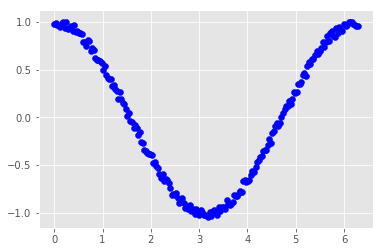

In [9]:
X_toy= X_toy.astype(np.float32).reshape((N, 1))
y_toy = y_toy.astype(np.float32).reshape((N, 1))

print(np.shape(X_toy))
plt.scatter(X_toy,y_toy,c='blue')

In [10]:
N = 50
X_test = np.random.rand(N)*2*np.pi #Generate N dapoints between 0 and pi
y_test = np.cos(X_test)

X_test= X_test.astype(np.float32).reshape((N, 1))
y_test = y_test.astype(np.float32).reshape((N, 1))

In [11]:
n_input_features = 1
n_output = 1 #For regression we usually use only one output. For classification we use as many outputs as classes we have
n_hidden_units = 10

**Placeholders:**
Need to be given a shape and type of the input.

In [12]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32,(None,n_input_features)) #None helps the placeholder to adjust to the batch size
y_true = tf.placeholder(tf.float32,(None,n_output)) #Nx1

**Variables:** Need to be given the shape with an initial value

In [13]:
#Input to hidden layer
initial_weight_1 = tf.truncated_normal([n_input_features,n_hidden_units], stddev=0.1)
weight_1  = tf.Variable(initial_weight_1)
initial_bias_1 = tf.constant(0.1, shape = [n_hidden_units])
bias_1 = tf.Variable(initial_bias_1)

#Hidden to output layer
initial_weight_2 = tf.truncated_normal([n_hidden_units,n_output], stddev=0.1)
weight_2  = tf.Variable(initial_weight_2)
initial_bias_2 = tf.constant(0.1, shape = [n_output]) 
bias_2 = tf.Variable(initial_bias_2)



**Graph:** We define the operation we would like our Graph to execute

In [14]:
h_1 = tf.nn.relu(tf.matmul(x,weight_1)+bias_1)
y_pred = tf.nn.tanh(tf.matmul(h_1,weight_2)+bias_2)

**Loss:** We define a loss or cost function, which we want to minimize through trainning.

In [15]:
loss = tf.reduce_mean(tf.square(tf.subtract(y_pred,y_true)))
accuracy = tf.sqrt(tf.reduce_mean(0.5*tf.square(tf.subtract(y_pred,y_true)))) #RMSE

**Optimizer**

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss) 

**Initialize variable:** Once we are all set, we create an initializer for all the variables we want to train.

In [17]:
init = tf.global_variables_initializer()

Ways of creating a session

sess = tf.Session()
sess = tf.InteractiveSession()
with tf.Session() as sess:''''''

## Session

As it was mentioned before, the session is the place where all the operations take place. Through the session we can run, optimize and execute the different operations and parameters we have created in our Graph.

In [18]:
with tf.Session() as sess:
    sess.run(init) # initialize all the variables before training
    batch_size = 10 # we will feed the network with batches of 10 data points and train only with this datapoint 
    batches = len(X_toy)//batch_size # the network is fed as many times as necessary to train with all the data
    epochs = 1000 # Once we have train our network with all of our dta points we have completed one epoch.
    
    for epoch in range(epochs): #we train for all the epochs we want
        for i in range(batches): #we train for all the batches in the dataset
            
            batch_x = X_toy[i*batch_size:(i+1)*batch_size]
            batch_y = y_toy[i*batch_size:(i+1)*batch_size]
            
            sess.run(train, feed_dict={x: batch_x,y_true: batch_y}) # Run the "train" operation, feeding the data to fill placeholders
        
        
    
        if epoch%100 == 0:
            test_loss = sess.run(loss,feed_dict={x: X_test,y_true: y_test})
            test_acc = sess.run(accuracy,feed_dict={x: X_test,y_true: y_test})
            print('Training epoch {}/{}. Loss = {}, RMSE = {}'.format(epoch,epochs,test_loss,test_acc))
    
    prediction = sess.run(y_pred,feed_dict={x: X_toy})

Training epoch 0/1000. Loss = 0.47807982564, RMSE = 0.488917082548
Training epoch 100/1000. Loss = 0.479021430016, RMSE = 0.48939833045
Training epoch 200/1000. Loss = 0.474342435598, RMSE = 0.487002283335
Training epoch 300/1000. Loss = 0.464668929577, RMSE = 0.48201084137
Training epoch 400/1000. Loss = 0.44511282444, RMSE = 0.471758842468
Training epoch 500/1000. Loss = 0.412269830704, RMSE = 0.454020828009
Training epoch 600/1000. Loss = 0.365571945906, RMSE = 0.427534759045
Training epoch 700/1000. Loss = 0.309283614159, RMSE = 0.393245220184
Training epoch 800/1000. Loss = 0.251831680536, RMSE = 0.354846209288
Training epoch 900/1000. Loss = 0.1998282969, RMSE = 0.31609198451


Now that we have trained the model, it is easy to see how tensorflow works. We can see that if we want to run the *"train"* instance, we need to feed data to both placeholders we have defined (*x* and *y_true*), since they are part of the graph needed to compute *"train"*. However, when we ask the session to compute "y_pred" to see the output of the network, we only need to pass in data to fill the placeholder *"x"*, since the portion of the graph needed to calculate *"y_pred"* does not need to use the placeholder *"y_true"*. 

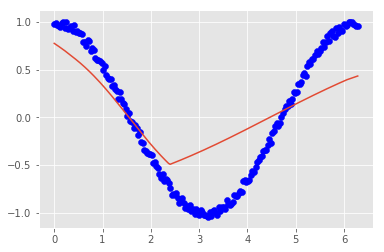

In [19]:
plt.scatter(X_toy,y_toy,c='blue') #Plot labels
plt.plot(X_toy,prediction) #Plot NN prediction

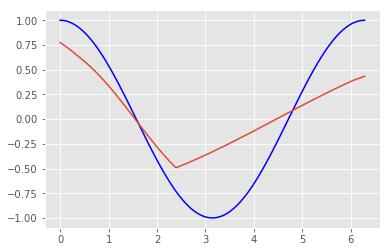

In [20]:
y_ = np.cos(X_toy) #without the noise
plt.plot(X_toy,y_,c='blue')
plt.plot(X_toy,prediction)

# Deep Neural Network for Classification

We will perform a classification task for the MFPT dataset.

In [21]:
import os
from scipy import misc
import numpy as np
import re
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


In [22]:
print('My path is : {}'.format(os.getcwd()))

My path is : /Users/ELD/Documents/UChile/Courses/Deep Learning for Diagnosis and Prognosis/Jupyter Tutorials/Deep Neural Nets


In [23]:
rgb = True
images=[]
names=[]
n_images=0
target=[]
Folder = "MFPT32Spectrograms"
path= os.getcwd()+"//"+Folder

In [24]:
#iterate over the files in the folder
for filename in os.listdir(path):
    try:
        n_images+=1
        names.append(filename)
        img = misc.imread(path + '/' + filename, flatten = not rgb)
        images.append(img)
    except (OSError, IOError):
        print('Oops...Not an image file')
        continue

#save the labels
for name in names:
    try:
        name=name.split(".")[0]        
        target_n = re.split("_", name)[1]
        target.append(target_n)
    except (IndexError):
        print('Oops...Not an image file')
        continue

Oops...Not an image file
Oops...Not an image file


In [25]:
#save the data
data = np.asarray(images)
X = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]*data.shape[3])) #Reshape, so each row is an image
labels=(np.asarray(target)).astype(np.float)

#np.save('data'+"_"+Folder, data)
#np.save('labels'+"_"+Folder, target)

In [26]:
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(labels.reshape(-1,1))
np.shape(y)

(10848, 3)

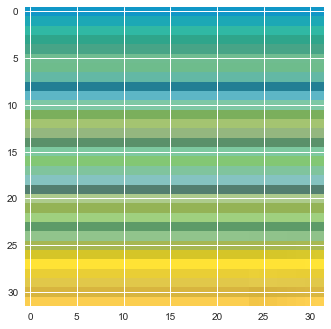

In [27]:
sample = X[0]
sample = np.reshape(sample,(32,32,3))
plt.imshow(sample)

In [28]:
n_classes = int(max(labels)-min(labels)+1)
print('We have n = {} different classes'.format(n_classes))

We have n = 3 different classes


In [29]:
n_input_features = 32*32*3 #This is the length of the image when flatten out
n_hidden_units_1 = 100
n_hidden_units_2 = 100
n_hidden_units_3 = 100
n_output = n_classes # We need as many output neurons as classes we have

In [30]:
tf.reset_default_graph()

In [31]:
#We will create a newtwork with one input, three hidden, and an output layer
def add_layer(inputs, in_size, out_size, activation_function=None, layer="Layer"):
    # add one more layer and return the output of this layer
    with tf.name_scope(layer):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
        with tf.name_scope('Wx_plus_b'):
            h = tf.add(tf.matmul(inputs, Weights), biases)
         
        return activation_function(h, )

In [32]:
with tf.name_scope("Inputs"):
    x = tf.placeholder(tf.float32,(None,n_input_features),name = "data") #None helps the placeholder to adjust to the batch size
    y_true = tf.placeholder(tf.float32,(None,n_output),name = "labels") #Nx3

In [33]:
# add hidden layers
h1 = add_layer(x, n_input_features, n_hidden_units_1, activation_function=tf.nn.relu, layer = "Layer_1") #Input to first hidden layer
h2 = add_layer(h1, n_hidden_units_1, n_hidden_units_2, activation_function=tf.nn.relu, layer = "Layer_2") #First to Second hidden layer
h3 = add_layer(h2, n_hidden_units_2, n_hidden_units_3, activation_function=tf.nn.relu, layer = "Layer_3") #Second to Third hidden layer

# add output layer
y_pred = add_layer(h3, n_hidden_units_3, n_output, activation_function=tf.nn.softmax, layer = "Output") #Third to output layer

In [34]:
with tf.name_scope("Cross_Entropy"):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,
        logits=y_pred))
    
    tf.summary.scalar('Loss', cross_entropy)

In [35]:
with tf.name_scope("Train"):
    train_class = tf.train.GradientDescentOptimizer(0.0001).minimize(cross_entropy)

In [36]:
init = tf.global_variables_initializer()

In [37]:
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Data Preprocessing

Now, though we have successfully defined our Graph and we are ready to start our Session, there is one more step before going into training. This is data preprocessing.

First, we need to split our data set in a Training set and a Test set, since calculating the accuracy over the training data can lead to overfitting, and thus a bad model. Normal train-test splitting ratios go from 90-10% to 70-30%.

On the other hand, when dealing with more than one feature in the input data, it is of good practice to normalize the data, so no feature is more important than others. Since we are not suppose to know anything about the test set, normalizing is fitted to the training set and then applyied to the test set.

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=24) #20% of the data is left for testing

from sklearn.preprocessing import MinMaxScaler
sc_X=MinMaxScaler(feature_range=(-1,1))
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

/Users/ELD/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [39]:
#Create path to save tensorborad file

Folder = 'logs' 
File = 'Model_1'
mypath = os.path.join(os.getcwd(),Folder)
if not os.path.isdir(mypath):
    os.makedirs(mypath)  
        

In [40]:
with tf.Session() as sess:
    
    writer = tf.summary.FileWriter(mypath,sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init) # initialize all the variables before training
    batch_size = 96 # we will feed the network with batches of 10 data points and train only with this datapoint 
    batches = len(X_train)//batch_size # the network is fed as many times as necessary to train with all the data
    epochs = 200 # Once we have train our network with all of our dta points we have completed one epoch.
    
    for epoch in range(epochs): #we train for all the epochs we want
        for i in range(batches): #we train for all the batches in the dataset
            
            batch_x = X_train[i*batch_size:(i+1)*batch_size]
            batch_y = y_train[i*batch_size:(i+1)*batch_size]
            sess.run(train_class, feed_dict={x: batch_x , y_true: batch_y}) # Run the "train" operation, feeding the data to fill placeholders    
    
        if (epoch+1)%10 == 0:
            train_acc = sess.run(accuracy,feed_dict={x: batch_x,y_true: batch_y})
            test_acc = sess.run(accuracy,feed_dict={x: X_test,y_true: y_test})
            print('Training epoch {}/{}. Train Accuracy = {} , Test Accuracy = {}'.format(epoch,epochs,train_acc,test_acc))
            
            result = sess.run(merged,feed_dict={x: batch_x,y_true: batch_y})
            writer.add_summary(result, epoch)
            
    test_pred =  sess.run(y_pred,feed_dict={x: X_test})

Training epoch 9/200. Train Accuracy = 0.416666656733 , Test Accuracy = 0.391705065966
Training epoch 19/200. Train Accuracy = 0.416666656733 , Test Accuracy = 0.391244232655
Training epoch 29/200. Train Accuracy = 0.416666656733 , Test Accuracy = 0.394009202719


KeyboardInterrupt: 

In [205]:
prediction = np.argmax(test_pred, axis=1)
true = np.argmax(y_test, axis=1)

In [206]:
total_classes = np.sum(confusion_matrix(prediction,true),axis=1)*1.0
matrix = confusion_matrix(true,prediction)*1.0

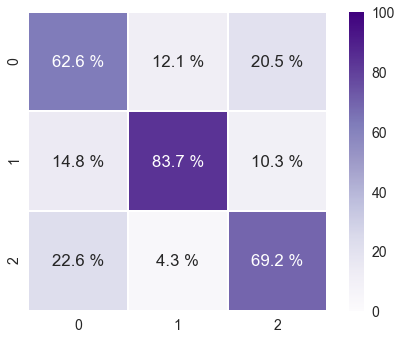

In [207]:
df_cm = pd.DataFrame(np.divide(matrix * 100, total_classes), range(3), range(3))
sn.set(font_scale=1.4)#for label size
fig, ax0 = plt.subplots(1,1)
ax = sn.heatmap(df_cm, annot=True, fmt = '.1f', square=1, linewidth=1.,vmin=0, vmax=100,cmap='Purples')
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

## Tensorboard

To run tensorboard. Open a terminal, go to the folder where this notebook is contained and run: 'tensorboard --logdir="logs"'
Let the comand execute, then copy and paste the link that will show up in your command promp. It should look something like: 'http://LAPTOP-4O8SCB9R:6006'